In [397]:
#from qiskit import QuantumCircuit, transpile
from qiskit import *
from qiskit import Aer
import qiskit.quantum_info as qi
import numpy as np
import matplotlib.pyplot as plt
import re

[[1.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]]


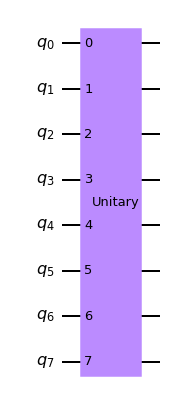

In [398]:
## Construction of the oracle Uw.
## Target state.
Target_state = '10110111'
# First we note the lenth of N.
N = len(Target_state)

# Then an identity matrix is created with the size 2**N.
U = np.identity(2 ** N, dtype=complex)


# Then the sign of the element corresponding to the target state is flipped. To do that we first convert the
# target state from binary to decimal number. 
Target_index = int(Target_state, 2)

U.itemset((Target_index, Target_index),-1)

print(U)
qc = QuantumCircuit(N)
qc.unitary(U,[i for i in range(N)])
qc.draw('mpl')

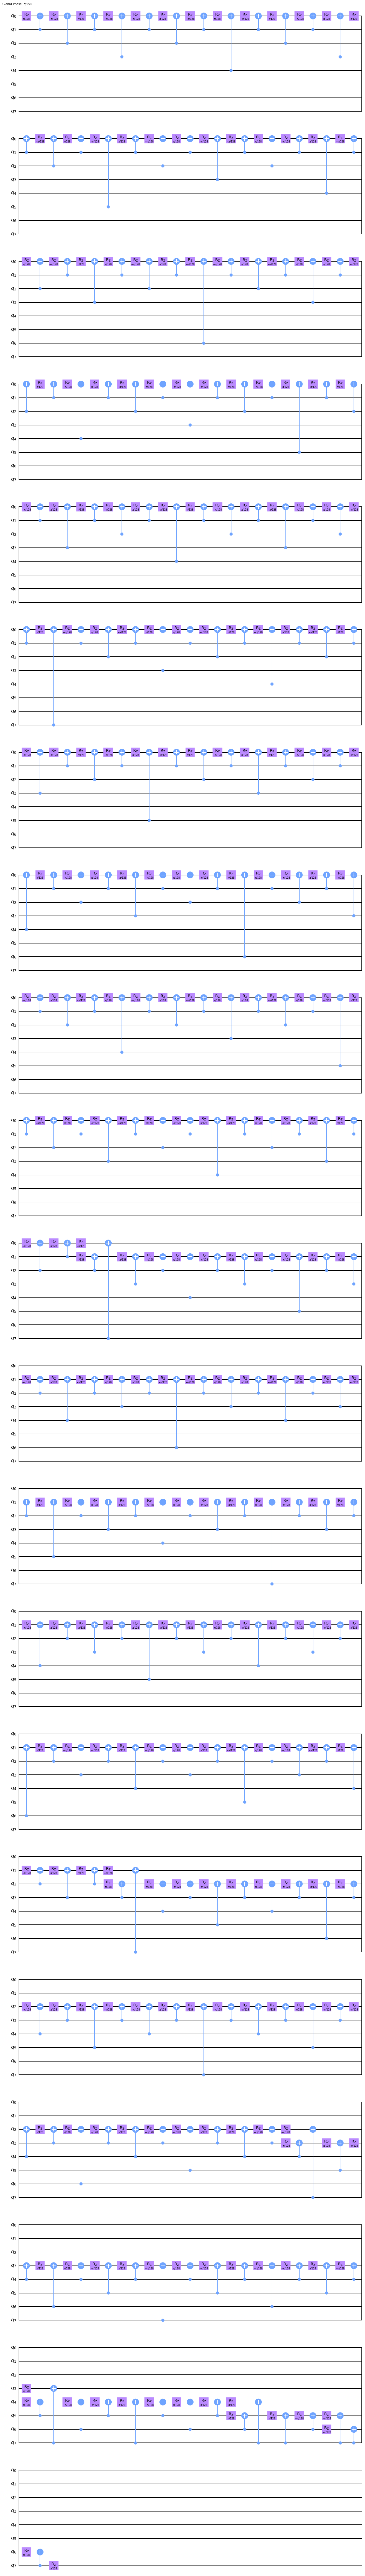

In [399]:
# The following line unfold the input matrix using 'transpile'. We will use cnot and the u3 gate as our basis.
trans_qc = transpile(qc, basis_gates = ['id', 'rz', 'cx','h'],optimization_level = 3)
trans_qc.draw('mpl')

In [400]:
f = trans_qc
#print(str(f[2][1]).split(',')[2])

In [401]:
## (Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.9817477042468101]),
#[Qubit(QuantumRegister(3, 'q'), 0)], [])

## (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 0)], [])

## (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
#[Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 0)], [])

In [402]:
def List_Gates(Gate_Number):
    
    
    ## The list will hold string along with the angles in case of u3.
    l = []
    
    Name_of_Gate = []
    
    ## The list will hold the qubit in case of u3.
    Qubit = []    
    
    ## The list will hold the numerical value (float) of the angle in case of u3.
    Angle = []

    ## The following two lines will be used to separate the numerical value of the angle from 
    # a mixture of string and digits.
    numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ )?'
    
    rx = re.compile(numeric_const_pattern, re.VERBOSE)
    
    if str(trans_qc[Gate_Number][0]).split(',')[0][-3:-1] == 'rz':
        
        Name_of_Gate.append('rz')        
        ## For the gate rz, there is one angle. The following lines puts the string which contain
        # the angle along with other alphabets in a list l.
        l.append(str(list(f)[Gate_Number]).split(',')[3])

        
        ## The following loop extracts the angle from the string of alphabet and digit.
        for i in l:
            
            if rx.findall(i) == []:
                
                ## the angle zero is written as 0.0 .
                Angle.append(0.0)
                
            else:
                
                Angle.append(float(rx.findall(i)[0]))
                
        ## the qubit on which rz acts is listed.        
        Qubit.append(re.sub("\D", "", str(trans_qc[Gate_Number][1]).split(',')[2]))  
        
        
    elif str(trans_qc[Gate_Number][0]).split(',')[0][-2:-1] == 'h':
        
        Name_of_Gate.append('h')
        Qubit.append(re.sub("\D", "", str(trans_qc[Gate_Number][1]).split(',')[2]))
    
    
        ## if the gate is cx then the Angle list is empty.        
    else:
        
        Name_of_Gate.append('cx')     
        ## the control and the target bit is listed.
        Control_bit = re.sub("\D", '', str(trans_qc[Gate_Number][1][0]).split(',')[2])
        
        Target_bit = re.sub("\D", '', str(trans_qc[Gate_Number][1][1]).split(',')[2])   
        
        Qubit.append([Control_bit, Target_bit])
    
    
    return Name_of_Gate,Angle, Qubit
l = []
for i in range(len(f)):
    l.append(List_Gates(i))
print(l[9][2][0][0])

1


In [403]:
## The dimension of the matrix is fixed by the number of qubits.
def Hadamard(Qubit):
    
    ## Changing the simulator 
    backend = Aer.get_backend('unitary_simulator')

    ## The circuit without measurement
    circ = QuantumCircuit(N)
    circ.h(Qubit)

    ## job execution and getting the result as an object
    job = execute(circ, backend)
    result = job.result()

    ## get the unitary matrix from the result object
    return result.get_unitary(circ)

In [404]:
#print(Hadamard(0))

In [405]:
## The following function returns the matrix of cnot gate with the target and control bit as input.
## The dimension of the matrix is fixed by the number of qubits.
def C_not(t,c):
    ## Changing the simulator 
    backend = Aer.get_backend('unitary_simulator')

    ## The circuit without measurement
    circ = QuantumCircuit(N)
    circ.cx(t,c)

    ## job execution and getting the result as an object
    job = execute(circ, backend)
    result = job.result()

    ## get the unitary matrix from the result object
    return result.get_unitary(circ) 

In [406]:
def Rz(Angle, Qubit):
    ## Changing the simulator 
    backend = Aer.get_backend('unitary_simulator')

    ## The circuit without measurement
    circ = QuantumCircuit(N)
    circ.rz(Angle, Qubit)

    ## job execution and getting the result as an object
    job = execute(circ, backend)
    result = job.result()

    ## get the unitary matrix from the result object
    return result.get_unitary(circ)     

In [407]:
#print(Rz(np.pi/2,0))

In [408]:
Matrix = np.identity(2**N, dtype = complex) 
for i in range(len(l)):
    
    if l[i][0][0] == 'rz':
        Matrix = np.matmul(Rz(l[i][1][0], int(l[i][2][0])) ,Matrix)
        
    elif l[i][0][0] == 'h':
        Matrix = np.matmul(Hadamard(int(l[i][2][0])), Matrix)
        
    else:
        Matrix = np.matmul(C_not(int(l[i][2][0][0]), int(l[i][2][0][1])), Matrix)
        
#print(Matrix)

# Grover's algorithm using the above 1 and 2 qubit unitaries

## Diffusion operator $2|\psi><\psi| - I$

In [409]:
A = np.ones((2**N, 2**N))
Phase = (2/(2**N))*A - np.identity(2**N, dtype = complex)
#print(Phase)

## Grover operator $(2|\psi><\psi|-I)\times Oracle$

In [410]:
G = np.matmul(Phase, Matrix)

## Application of Grover operator 

In [411]:
def Operate_R_times(Operator, R):
    N = int(np.sqrt(Operator.size))
    Id = np.identity(N, dtype = complex)
    for i in range(R):
        Id = np.matmul(Operator, Id)
    return Id
R = int(np.pi*np.sqrt(2**N)/4)
print(R)

12


In [412]:
Psi = np.array([1 for i in range(2**N)])/np.sqrt(2**N)
#print(Psi)

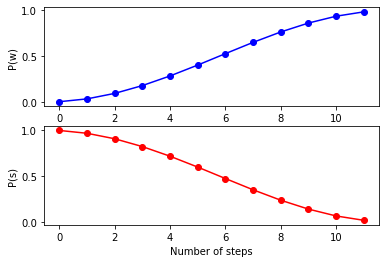

In [413]:
def Return_Probabilities(Wavevector):
    return np.abs(Wavevector[Target_index])**2
Prob_w = []
Prob_s = []
for i in range(R):
    Prob_w.append(Return_Probabilities(Operate_R_times(G, i).dot(Psi)))
    Prob_s.append(1-Return_Probabilities(Operate_R_times(G, i).dot(Psi)))
    
plt.plot(Prob_w, 'bo-')
plt.plot(Prob_s, 'ro-')
ax1 = plt.subplot(211)
plt.plot(Prob_w, 'bo-')
ax1.set_ylabel('P(w)')
plt.tick_params('x', labelsize=10)
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(Prob_s, 'ro-')
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('P(s)')
plt.show()